In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df_house = pd.read_csv('../data/train.csv', index_col=0)
df_house_test = pd.read_csv('../data/test.csv', index_col=0)
df_all = pd.concat((df_house.iloc[:, :-1], df_house_test))

In [3]:
df_all_new = pd.get_dummies(df_all['MSSubClass'].replace([40, 150], 'Other'), prefix='MSSubClass')

In [4]:
cur_var = pd.get_dummies(df_all['MSZoning'].fillna('RL'), prefix='MSZoning')
df_all_new = df_all_new.join(cur_var)

In [5]:
df_all_new['LotFrontage'] = np.log(df_all['LotFrontage'].fillna(df_all['LotFrontage'].mean()) + 1)

In [6]:
df_all_new['LotArea'] = np.log(df_all['LotArea'] + 1)

In [7]:
df_all_new['Street'] = 1 * (df_all['Street'] == 'Pave')

In [8]:
cur_var = pd.get_dummies(df_all['Alley'].fillna('None'), prefix='Alley')
df_all_new = df_all_new.join(cur_var)

In [9]:
cur_var = pd.get_dummies(df_all['LotShape'], prefix='LotShape')
df_all_new = df_all_new.join(cur_var)

In [10]:
cur_var = pd.get_dummies(df_all['LandContour'], prefix='LandContour')
df_all_new = df_all_new.join(cur_var)

In [11]:
cur_var = pd.get_dummies(df_all['LotConfig'].replace(['FR2', 'FR3'], 'FR'), 'LotConfig')
df_all_new = df_all_new.join(cur_var)

In [12]:
cur_var = pd.get_dummies(df_all['LandSlope'], 'LandSlope')
df_all_new = df_all_new.join(cur_var)

In [13]:
cur_var = pd.get_dummies(df_all['Neighborhood'], 'Neighborhood')
df_all_new = df_all_new.join(cur_var)

In [14]:
cur_var = pd.get_dummies(df_all['Condition1'], prefix='Condition1')
df_all_new = df_all_new.join(cur_var)

In [15]:
cur_var = pd.get_dummies(df_all['BldgType'], 'BldgType')
df_all_new = df_all_new.join(cur_var)

In [16]:
cur_var = pd.get_dummies(df_all['HouseStyle'], 'HouseStyle')
df_all_new = df_all_new.join(cur_var)

In [17]:
cur_var = pd.get_dummies(df_all['OverallQual'].map(lambda x: 2 if x < 3 else x), 'OveralQual')
df_all_new = df_all_new.join(cur_var)

In [18]:
cur_var = pd.get_dummies(df_all['OverallCond'], 'OverallCond')
df_all_new = df_all_new.join(cur_var)

In [19]:
year_built_new = pd.qcut(df_all['YearBuilt'], 10)
cur_var = pd.get_dummies(year_built_new, 'YearBuilt')
df_all_new = df_all_new.join(cur_var)

In [20]:
year_remod = pd.qcut(df_all['YearRemodAdd'], 5)
cur_var = pd.get_dummies(year_remod, 'YearRemodAdd')
df_all_new = df_all_new.join(cur_var)

In [21]:
temp = df_all['RoofStyle'].replace(['Mansard', 'Shed'], 'Other')
cur_var = pd.get_dummies(temp, prefix='RoofStyle')
df_all_new = df_all_new.join(cur_var)

In [22]:
cur_var = pd.get_dummies(df_all['RoofMatl'].map(lambda x: 'CompShg' if x == 'CompShg' else 'Tar&Grv' if x == 'Tar&Grv' else 'Other'), 'RoofMatl')
df_all_new = df_all_new.join(cur_var)

In [23]:
temp = df_all['Exterior1st'].replace(['BrkComm', 'AsphShn', 'Stone', 'CBlock', 'ImStucc'], 'Other')
temp = temp.fillna('Other')
cur_var = pd.get_dummies(temp, prefix='Exterior1st')
df_all_new = df_all_new.join(cur_var)

In [24]:
temp = df_all['Exterior2nd'].replace(['Brk Cmn', 'AsphShn', 'Stone', 'CBlock'], 'Other')
temp = temp.fillna('Other')
cur_var = pd.get_dummies(temp, prefix='Exterior2nd')
df_all_new = df_all_new.join(cur_var)

In [25]:
cur_var = pd.get_dummies(df_all['MasVnrType'].fillna('None'), prefix='MasVnrType')
df_all_new = df_all_new.join(cur_var)

In [26]:
df_all_new['MasVnrArea'] = np.log(df_all['MasVnrArea'].fillna(0) + 1)

In [27]:
cur_var = pd.get_dummies(df_all['ExterQual'], 'ExterQual')
df_all_new = df_all_new.join(cur_var)

In [28]:
cur_var = pd.get_dummies(df_all['ExterCond'].replace(['Po'], 'Fa'), 'ExterCond')
df_all_new = df_all_new.join(cur_var)

In [29]:
cur_var = pd.get_dummies(df_all['Foundation'], prefix='Foundation')
df_all_new = df_all_new.join(cur_var)

In [30]:
cur_var = pd.get_dummies(df_all['BsmtQual'].fillna('None'), 'BsmtQual')
df_all_new = df_all_new.join(cur_var)

In [31]:
cur_var = pd.get_dummies(temp, prefix='BsmtCond')
df_all_new = df_all_new.join(cur_var)

In [32]:
cur_var = pd.get_dummies(df_all['BsmtExposure'].fillna('None'), prefix='BsmtExposure')
df_all_new = df_all_new.join(cur_var)

In [33]:
cur_var = pd.get_dummies(df_all['BsmtFinType1'].fillna('None'), prefix='BsmtFinType1')
df_all_new = df_all_new.join(cur_var)

In [34]:
df_all_new['BsmtFinSF1'] = np.log(df_all['BsmtFinSF1'].fillna(0) + 1)

In [35]:
cur_var = pd.get_dummies(df_all['BsmtFinType2'].fillna('None'), prefix='BsmtFinType2')
df_all_new = df_all_new.join(cur_var)

In [36]:
df_all_new['BsmtFinSF2'] = np.log(df_all['BsmtFinSF2'].fillna(0) + 1)

In [37]:
df_all_new['BsmtUnfSF'] = np.log(df_all['BsmtUnfSF'].fillna(0) + 1)

In [38]:
df_all_new['TotalBsmtSF'] = np.log(df_all['TotalBsmtSF'].fillna(0) + 1)

In [39]:
temp = df_all['Heating'].replace(['Wall', 'OthW', 'Floor'], 'Other')
cur_var = pd.get_dummies(temp, prefix='Heating')
df_all_new = df_all_new.join(cur_var)

In [40]:
temp = df_all['HeatingQC'].replace(['Po'], 'Fa')
cur_var = pd.get_dummies(temp, prefix='HeatingQC')
df_all_new = df_all_new.join(cur_var)

In [41]:
df_all_new['CentralAir'] = np.where(df_all['CentralAir'] == 'Y', 1, 0)

In [42]:
temp = df_all['Electrical'].fillna('Other').replace(['FuseP', 'Mix'], 'Other')
cur_var = pd.get_dummies(temp, prefix='Electrical')
df_all_new = df_all_new.join(cur_var)

In [43]:
df_all_new['1stFlrSF'] = np.log(df_all['1stFlrSF'])

In [44]:
df_all_new['2ndFlrSF'] = np.log(df_all['2ndFlrSF'] + 1)

In [45]:
df_all_new['LowQualFinSF'] = np.where(df_all['LowQualFinSF'] == 0, 0, 1)

In [46]:
df_all_new['GrLivArea'] = np.log(df_all['GrLivArea'] + 1)

In [47]:
cur_var = pd.get_dummies(df_all['BsmtFullBath'].fillna(0).replace(3, 2).astype(int), 'BsmtFullBath')
df_all_new = df_all_new.join(cur_var)

In [48]:
df_all_new['BsmtHalfBath'] = df_all['BsmtHalfBath'].fillna(0).replace(2, 1)

In [49]:
cur_var = pd.get_dummies(df_all['FullBath'].fillna(0).replace(4, 3).astype(int), 'FullBath')
df_all_new = df_all_new.join(cur_var)

In [50]:
cur_var = pd.get_dummies(df_all['HalfBath'], 'HalfBath')
df_all_new = df_all_new.join(cur_var)

In [51]:
cur_var = pd.get_dummies(df_all['BedroomAbvGr'].replace(8, 6), 'BedroomAbvGr')
df_all_new = df_all_new.join(cur_var)

In [52]:
df_all_new['KitchenAbvGr'] = (df_all['KitchenAbvGr'] >= 2) * 1

In [53]:
cur_var = pd.get_dummies(df_all['KitchenQual'].fillna('TA'), 'KitchenQual')
df_all_new = df_all_new.join(cur_var)

In [54]:
cur_var = pd.get_dummies(df_all['TotRmsAbvGrd'].replace({2:3, 13:12, 14:12, 15:12}).astype(int), 'TotRmsAbvGrd')
df_all_new = df_all_new.join(cur_var)

In [55]:
cur_var = pd.get_dummies(df_all['Functional'].replace(['Maj2', 'Sev'], 'Maj1'), 'Functional')
df_all_new = df_all_new.join(cur_var)

In [56]:
cur_var = pd.get_dummies(df_all['Fireplaces'].replace([4], 3), 'Fireplaces')
df_all_new = df_all_new.join(cur_var)

In [57]:
cur_var = pd.get_dummies(df_all['FireplaceQu'].fillna('None'), 'FireplaceQu')
df_all_new = df_all_new.join(cur_var)

In [58]:
cur_var = pd.get_dummies(df_all['GarageType'].fillna('None'), 'GarageType')
df_all_new = df_all_new.join(cur_var)

In [59]:
garage_year_built = pd.qcut(df_all['GarageYrBlt'], 5, labels=['oldest', 'old', 'middle', 'new', 'newest'])
cur_var = pd.get_dummies(garage_year_built.astype('object').fillna('None'), 'GarageYrBlt')
df_all_new = df_all_new.join(cur_var)

In [60]:
df_all_new['GarageCars'] = df_all['GarageCars'].replace([4, 5], 3).fillna(0)

In [61]:
df_all_new['GarageArea'] = np.log(df_all['GarageArea'].fillna(0) + 1)

In [62]:
cur_var = pd.get_dummies(df_all['GarageQual'].replace({'Po':'Fa', 'Ex':'Gd'}).fillna('None'), 'GarageQual')
df_all_new = df_all_new.join(cur_var)

In [63]:
cur_var = pd.get_dummies(df_all['GarageCond'].replace({'Ex':'Gd'}).fillna('None'), 'GarageCond')
df_all_new = df_all_new.join(cur_var)

In [64]:
cur_var = pd.get_dummies(df_all['PavedDrive'], 'PavedDrive')
df_all_new = df_all_new.join(cur_var)

In [65]:
df_all_new['WoodDeckSF'] = np.log(df_all['WoodDeckSF'] + 1)

In [66]:
df_all_new['OpenPorchSF'] = np.log(df_all['OpenPorchSF'] + 1)

In [67]:
df_all_new['EnclosedPorch'] = np.log(df_all['EnclosedPorch'] + 1)

In [68]:
df_all_new['3SsnPorch'] = np.log(df_all['3SsnPorch'] + 1)

In [69]:
df_all_new['ScreenPorch'] = np.log(df_all['ScreenPorch'] + 1)

In [70]:
df_all_new['PoolArea'] = np.log(df_all['PoolArea'] + 1)

In [71]:
cur_var = pd.get_dummies(temp, 'Fence')
df_all_new = df_all_new.join(cur_var)

In [72]:
df_all_new['MiscFeature'] = (df_all['MiscFeature'] == 'Shed') * 1

In [73]:
df_all_new['MiscVal'] = np.log(df_all['MiscVal'] + 1)

In [74]:
cur_var = pd.get_dummies(df_all['MoSold'], 'MoSold')
df_all_new = df_all_new.join(cur_var)

In [75]:
cur_var = pd.get_dummies(df_all['YrSold'], 'YrSold')
df_all_new = df_all_new.join(cur_var)

In [76]:
cur_var = pd.get_dummies(df_all['SaleType'].fillna('WD'), "SaleType")
df_all_new = df_all_new.join(cur_var)

In [77]:
cur_var = pd.get_dummies(df_all['SaleCondition'], 'SaleCondition')
df_all_new = df_all_new.join(cur_var)

In [78]:
df_all_new.shape

(2919, 347)

In [79]:
df_train_final = df_all_new.loc[df_house.index]
df_test_final = df_all_new.loc[df_house_test.index]
y_train_final = np.log(df_house['SalePrice']).values

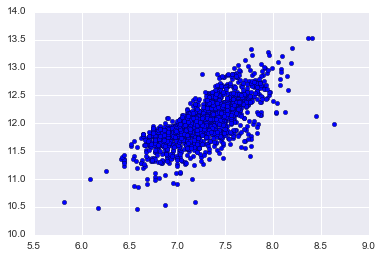

In [80]:
plt.scatter(df_train_final['GrLivArea'], y_train_final);

In [83]:
bad = ((df_train_final['GrLivArea'] > 8.3) & (y_train_final < 12.5)).values
df_train_final = df_train_final[~bad]
y_train_final = y_train_final[~bad]

In [84]:
col_names_scale = df_train_final.columns[df_train_final.max() > 5]

In [85]:
mean_cols_train = df_train_final.loc[:, col_names_scale].mean()
std_cols_train = df_train_final.loc[:, col_names_scale].std()
df_train_final.loc[:, col_names_scale] = (df_train_final.loc[:, col_names_scale] - mean_cols_train) / std_cols_train

In [86]:
mean_cols_test = df_test_final.loc[:, col_names_scale].mean()
std_cols_test = df_test_final.loc[:, col_names_scale].std()
df_test_final.loc[:, col_names_scale] = (df_test_final.loc[:, col_names_scale] - mean_cols_test) / std_cols_test

In [87]:
X_train_final = df_train_final.values
X_test_final = df_test_final.values

In [88]:
X_train_final.shape, y_train_final.shape

((1458, 347), (1458,))

In [89]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.cross_validation import KFold
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV

In [90]:
kf = KFold(len(X_train_final), n_folds=10, shuffle=True)

In [91]:
def pred_score(y_pred, y_actual):
    return np.sqrt(np.mean((y_pred - y_actual) ** 2))

In [92]:
alphas = np.logspace(-2, 1.3, 100)
alpha_scores = {}
for alpha in alphas:
    test_scores = []
    clf = Ridge(alpha=alpha)
    for train_index, test_index in kf:
        X_train, X_test = X_train_final[train_index], X_train_final[test_index]
        y_train, y_test = y_train_final[train_index], y_train_final[test_index]
        clf.fit(X_train, y_train)

        y_pred_test = clf.predict(X_test)
        score = pred_score(y_pred_test, y_test)
        test_scores.append(score)
    alpha_scores[alpha] = np.mean(test_scores)

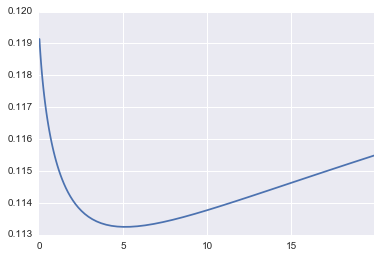

In [93]:
pd.Series(alpha_scores).plot();

In [96]:
import warnings
warnings.filterwarnings("ignore")

In [119]:
gbr = GradientBoostingRegressor()
parameters = {'max_features':[.1,], 'n_estimators':[1000, 1500, 2000, 2500, 3000],
             'learning_rate':[.03], 'max_depth': [2]}
clf = GridSearchCV(gbr, parameters, n_jobs=-1)
clf.fit(X_train_final, y_train_final)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.03], 'max_features': [0.1], 'n_estimators': [1000, 1500, 2000, 2500, 3000], 'max_depth': [2]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [120]:
clf.best_params_

{'learning_rate': 0.03,
 'max_depth': 2,
 'max_features': 0.1,
 'n_estimators': 2500}

In [99]:
pred_score(clf.predict(X_train_final), y_train_final)

0.070237347945561676

In [114]:
df_train_final_raw = df_all_new.loc[df_house.index]
df_test_final_raw = df_all_new.loc[df_house_test.index]
y_train_final = np.log(df_house['SalePrice']).values

bad = ((df_train_final_raw['GrLivArea'] > 8.3) & (y_train_final < 12.5)).values
df_train_final_raw = df_train_final_raw[~bad]
y_train_final = y_train_final[~bad]

X_train_final_raw = df_train_final_raw.values
X_test_final_raw = df_test_final_raw.values

In [115]:
def get_kfold_scores(clf, X_train_, y_train_):
    test_scores = []
    for train_index, test_index in kf:
        X_train, X_test = X_train_[train_index], X_train_[test_index]
        y_train, y_test = y_train_[train_index], y_train_[test_index]
        clf.fit(X_train, y_train)

        y_pred_test = clf.predict(X_test)
        score = pred_score(y_pred_test, y_test)
        test_scores.append(score)

    return test_scores

In [121]:
gbr = GradientBoostingRegressor(learning_rate=.03, max_depth=2, max_features=.1, n_estimators=2500)

In [122]:
ts = get_kfold_scores(gbr, X_train_final_raw, y_train_final)

In [123]:
np.mean(ts)

0.1159606898733008

In [124]:
rf = RandomForestRegressor()
parameters = {'n_estimators':[1000], 'max_features':[.1, .2, .3], 'min_samples_split':[2]}
clf = GridSearchCV(rf, parameters, n_jobs=-1)
clf.fit(X_train_final, y_train_final)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [2], 'max_features': [0.1, 0.2, 0.3], 'n_estimators': [1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [125]:
rf = RandomForestRegressor(n_estimators=1000, max_features=.2, n_jobs=-1)

In [126]:
ts = get_kfold_scores(gbr, X_train_final_raw, y_train_final)